Let us take a look at the influence of the hyperprior for the precision $\tau$ on the population size reconstructions.

In [1]:
denv4_gamma <- read.table("dengue4/Dengue4_gamma1e3.log",header = TRUE)

In [2]:
library(coda)
library(ggplot2)

In [3]:
remove_warmup <- function(dt, burnin = .1){
    return(
        dt[round(burnin * nrow(dt)):nrow(dt),]
    )
}

In [4]:
get_skygrid_pars <- function(dt){
    return(
          dt[, c(grep("precision", names(dt)), grep("PopSize", names(dt)) )]
    )
}

First off, [Dengue 4](https://github.com/beast-dev/beast-mcmc/blob/master/examples/Data/Dengue4.env.nex):

In [5]:
burnin <- .1
denv4_gamma <- remove_warmup(denv4_gamma)

In [6]:
sky_denv4_gamma <- get_skygrid_pars(denv4_gamma)
ESSs_gamma <- apply(sky_denv4_gamma, 2, coda::effectiveSize)

In [7]:
ESSs_gamma

skygrid.precision skygrid.logPopSize1 skygrid.logPopSize2 skygrid.logPopSize3 
            834.614            3577.545            2299.081            1065.536 
skygrid.logPopSize4 skygrid.logPopSize5 
           1716.049            2765.623

In [8]:
mean(ESSs_gamma[-1])

[1] 2284.767

In [9]:
denv4_gumbel <- read.table("dengue4/Dengue4_gumbel.log",header = TRUE)
denv4_gumbel <- remove_warmup(denv4_gumbel)
sky_denv4_gumbel <- get_skygrid_pars(denv4_gumbel)
ESSs_gumbel <- apply(sky_denv4_gumbel, 2, coda::effectiveSize)

In [10]:
ESSs_gumbel

skygrid.precision skygrid.logPopSize1 skygrid.logPopSize2 skygrid.logPopSize3 
           3748.559            4027.264            4411.404            2147.358 
skygrid.logPopSize4 skygrid.logPopSize5 
           5409.080            7690.226

In [11]:
mean(ESSs_gumbel[-1])

[1] 4737.067

In [12]:
cbind( colMeans(sky_denv4_gamma), coda::HPDinterval(coda::as.mcmc(sky_denv4_gamma)) )

,,lower,upper
skygrid.precision,156.320881,0.002693631,791.388261
skygrid.logPopSize1,3.395697,2.668808380,4.075553
skygrid.logPopSize2,3.549032,2.805996679,4.296088
skygrid.logPopSize3,3.538953,2.545656648,4.486353
skygrid.logPopSize4,3.252380,1.451708287,4.665224
skygrid.logPopSize5,3.192479,0.341558876,5.123068


In [13]:
cbind( colMeans(sky_denv4_gumbel), coda::HPDinterval(coda::as.mcmc(sky_denv4_gumbel)))

,,lower,upper
skygrid.precision,1.585266,0.2810379,3.396883
skygrid.logPopSize1,3.326032,2.5337807,4.144970
skygrid.logPopSize2,3.669285,2.8152021,4.518353
skygrid.logPopSize3,3.563434,2.3595640,4.851887
skygrid.logPopSize4,3.048569,1.1639462,4.833788
skygrid.logPopSize5,2.970754,0.3750370,5.587314


In [14]:
get_skygrid_for_plot <- function(dt){
    return(
#         dt[, unlist(sapply(c("skygrid.cutOff", "logPopSize"), function(x) grep(x, names(dt))) )]
        dt[,  grep("logPopSize", names(dt))]
    )
}

In [15]:
overlay_pop_sizes <- function(logs, youngest, cutOff, group_name = NULL){
  require(ggplot2)
  number_ticks <- function(n) {function(limits) pretty(limits, n)}
  ## 'logs' is a  **named** list of subsetted log files with the parameters of interest (popSizes)
  L <- length(logs)
  if(length(youngest) < L){
      warning("supplied youngest not of right dimension, replicating \n")
      youngest <- rep(youngest, L)
  }
  if(length(cutOff) < L){
      warning("supplied cutOff not of right dimension, replicating \n")
      cutOff <- rep(cutOff, L)
  } 
  M <- unlist(lapply(logs, ncol))
  ## Compute median and HPDs
  summaries <- lapply(logs, function(ll) {
    res <- cbind( apply(ll, 2, median), coda::HPDinterval(coda::as.mcmc(ll)))
    colnames(res) <- c("median", "lower", "upper")
    return(res)
  } )
  ## create ages and groups
  for(i in 1:L){
    summaries[[i]] <- data.frame(summaries[[i]], group = names(logs)[i],
                                 time = seq(youngest[i], youngest[i]-cutOff[i], length.out = M[i]) ) 
  } 
  forPlot <- do.call(rbind, summaries)
  if(is.null(group_name)) group_name <- "group"
  p <- ggplot(forPlot, aes( x = time, y = median, colour = group, fill = group)) + 
    geom_line() +
    geom_ribbon(aes(ymin = lower, ymax = upper), alpha = .2)+ 
    labs(fill = group_name, color = group_name) +
    scale_x_continuous("Time (years)", breaks = number_ticks(10)) + 
    scale_y_continuous("Log population size", expand = c(0, 0)) + 
    theme_bw()
  print(p)    
}

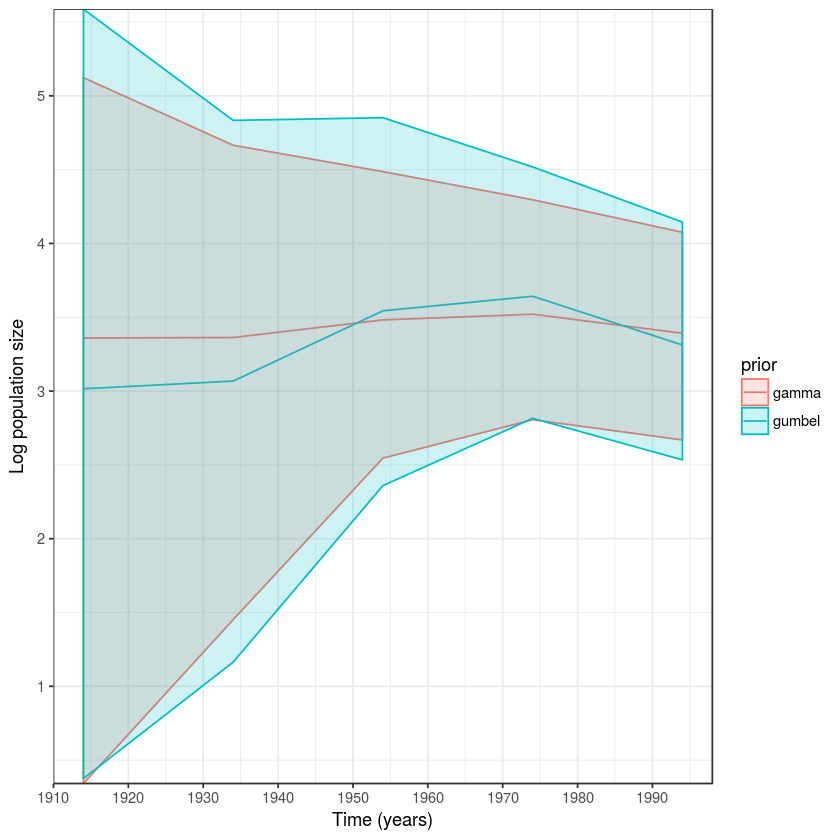

In [16]:
logs_denv4 <- list(
    gamma = get_skygrid_for_plot(denv4_gamma),
    gumbel = get_skygrid_for_plot(denv4_gumbel)
)
overlay_pop_sizes(logs = logs_denv4, youngest = c(1994, 1994), cutOff = c(80, 80), group_name = "prior")

Now, let's look at too much bigger data sets, [FMDV](https://github.com/maxbiostat/FMDV_AMERICA/tree/master/DATA/SEQUENCES) serotypes A and O

In [17]:
fmdv_A_gamma <- read.table("FMDV/FMDV_serotype_A_gamma.log", header = TRUE)
fmdv_A_gamma <- remove_warmup(fmdv_A_gamma)
sky_fmdv_A_gamma <- get_skygrid_pars(fmdv_A_gamma)
ESSs_gamma <- apply(sky_fmdv_A_gamma, 2, coda::effectiveSize)
ESSs_gamma[1]
mean(ESSs_gamma[-1])

skygrid.precision 
         865.6439

[1] 1348.455

In [18]:
fmdv_A_gumbel <- read.table("FMDV/FMDV_serotype_A_gumbel.log", header = TRUE)
fmdv_A_gumbel <- remove_warmup(fmdv_A_gumbel)
sky_fmdv_A_gumbel <- get_skygrid_pars(fmdv_A_gumbel)
ESSs_gumbel <- apply(sky_fmdv_A_gumbel, 2, coda::effectiveSize)
ESSs_gumbel[1]
mean(ESSs_gumbel[-1])

skygrid.precision 
         1430.774

[1] 1577.139

In [19]:
head(cbind( colMeans(sky_fmdv_A_gamma), coda::HPDinterval(coda::as.mcmc(sky_fmdv_A_gamma)) ))

,,lower,upper
skygrid.precision,1.459972,0.1816181,3.545483
skygrid.logPopSize1,1.042981,-2.2215234,4.174235
skygrid.logPopSize2,1.047798,-1.4713077,3.409651
skygrid.logPopSize3,1.067121,-0.3291867,2.451764
skygrid.logPopSize4,2.620016,1.2857117,3.941251
skygrid.logPopSize5,3.761163,2.6780823,5.027416


In [20]:
head(cbind( colMeans(sky_fmdv_A_gumbel), coda::HPDinterval(coda::as.mcmc(sky_fmdv_A_gumbel)) ))

,,lower,upper
skygrid.precision,1.313169,0.3600084,2.498497
skygrid.logPopSize1,1.052270,-2.1135611,4.016429
skygrid.logPopSize2,1.048757,-1.3571929,3.352851
skygrid.logPopSize3,1.043139,-0.2565164,2.388151
skygrid.logPopSize4,2.587843,1.2834954,3.891256
skygrid.logPopSize5,3.735570,2.7008407,4.841959


Warning message in overlay_pop_sizes(logs = logs_fmdvA, youngest = 2013, cutOff = 100, :
“supplied youngest not of right dimension, replicating 
”Warning message in overlay_pop_sizes(logs = logs_fmdvA, youngest = 2013, cutOff = 100, :
“supplied cutOff not of right dimension, replicating 
”

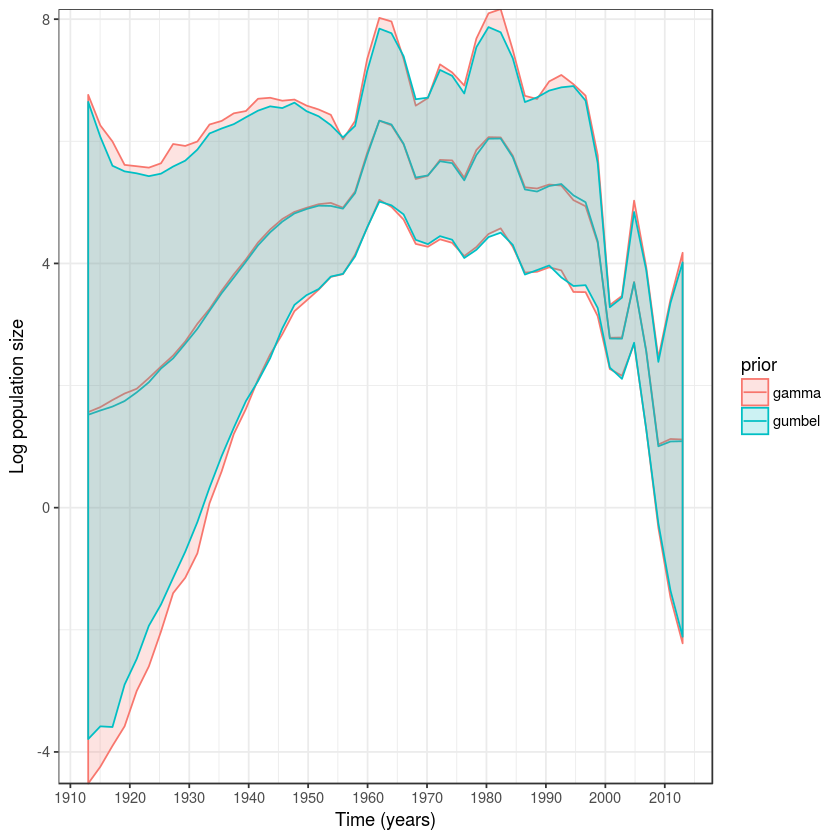

In [21]:
logs_fmdvA <- list(
    gamma = get_skygrid_for_plot(fmdv_A_gamma),
    gumbel = get_skygrid_for_plot(fmdv_A_gumbel)
)
overlay_pop_sizes(logs = logs_fmdvA, youngest = 2013, cutOff = 100, group_name = "prior")

OK, now it's the time of FMDV serotype O

In [22]:
fmdv_O_gamma <- read.table("FMDV/FMDV_serotype_O_gamma.log", header = TRUE)
fmdv_O_gamma <- remove_warmup(fmdv_O_gamma)
sky_fmdv_O_gamma <- get_skygrid_pars(fmdv_O_gamma)
ESSs_gamma <- apply(sky_fmdv_O_gamma, 2, coda::effectiveSize)
ESSs_gamma[1]
mean(ESSs_gamma[-1])

skygrid.precision 
         1280.892

[1] 1517.009

In [23]:
fmdv_O_gumbel <- read.table("FMDV/FMDV_serotype_O_gumbel.log", header = TRUE)
fmdv_O_gumbel <- remove_warmup(fmdv_O_gumbel)
sky_fmdv_O_gumbel <- get_skygrid_pars(fmdv_O_gumbel)
ESSs_gumbel <- apply(sky_fmdv_O_gumbel, 2, coda::effectiveSize)
ESSs_gumbel[1]
mean(ESSs_gumbel[-1])

skygrid.precision 
         2077.534

[1] 1930.886

In [24]:
head(cbind( colMeans(sky_fmdv_O_gamma), coda::HPDinterval(coda::as.mcmc(sky_fmdv_O_gamma)) ))

,,lower,upper
skygrid.precision,2.1186813,0.2363155,4.835650
skygrid.logPopSize1,0.8400831,-0.2097908,1.884518
skygrid.logPopSize2,1.5768924,1.0131562,2.196159
skygrid.logPopSize3,2.9277184,2.1731612,3.747238
skygrid.logPopSize4,2.6085911,2.2030994,3.024620
skygrid.logPopSize5,3.6425938,3.0674140,4.239751


In [25]:
head(cbind( colMeans(sky_fmdv_O_gumbel), coda::HPDinterval(coda::as.mcmc(sky_fmdv_O_gumbel)) ))

,,lower,upper
skygrid.precision,1.5776595,0.3989655,2.927537
skygrid.logPopSize1,0.8004503,-0.1351520,1.762982
skygrid.logPopSize2,1.5795878,1.0797801,2.179423
skygrid.logPopSize3,2.8589360,2.1194200,3.648305
skygrid.logPopSize4,2.4302254,2.0485826,2.832580
skygrid.logPopSize5,3.4714644,2.9050690,4.078399


Warning message in overlay_pop_sizes(logs = logs_fmdvO, youngest = 2011, cutOff = 100, :
“supplied youngest not of right dimension, replicating 
”Warning message in overlay_pop_sizes(logs = logs_fmdvO, youngest = 2011, cutOff = 100, :
“supplied cutOff not of right dimension, replicating 
”

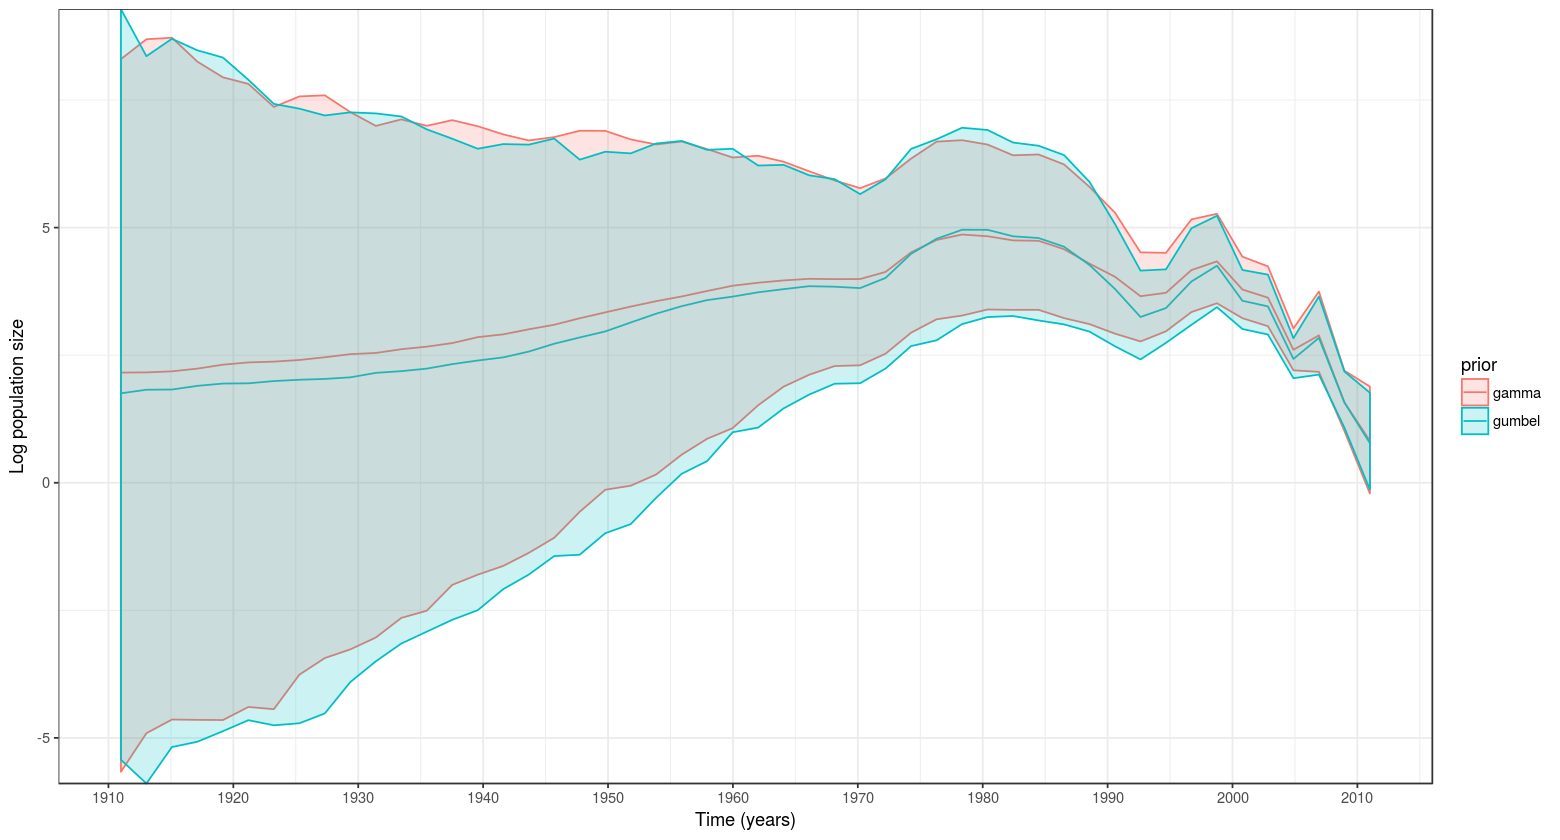

In [26]:
logs_fmdvO <- list(
    gamma = get_skygrid_for_plot(fmdv_O_gamma),
    gumbel = get_skygrid_for_plot(fmdv_O_gumbel)
)
options(repr.plot.width = 13, repr.plot.height = 7)
overlay_pop_sizes(logs = logs_fmdvO, youngest = 2011, cutOff = 100, group_name = "prior")

Now, let us look at some [Influenza H3N2](http://beast.community/phylodynamics_of_seasonal_influenza) data:

In [27]:
flu_h3n2_gamma <- read.table("fluH3N2/flu_h3n2_gamma.log", header = TRUE)
flu_h3n2_gamma <- remove_warmup(flu_h3n2_gamma)
sky_flu_h3n2_gamma <- get_skygrid_pars(flu_h3n2_gamma)
ESSs_gamma <- apply(sky_flu_h3n2_gamma, 2, coda::effectiveSize)
ESSs_gamma[1]
mean(ESSs_gamma[-1])

skygrid.precision 
         1504.038

[1] 2048.332

In [28]:
flu_h3n2_gumbel <- read.table("fluH3N2/flu_h3n2_gumbel.log", header = TRUE)
flu_h3n2_gumbel <- remove_warmup(flu_h3n2_gumbel)
sky_flu_h3n2_gumbel <- get_skygrid_pars(flu_h3n2_gumbel)
ESSs_gumbel <- apply(sky_flu_h3n2_gumbel, 2, coda::effectiveSize)
ESSs_gumbel[1]
mean(ESSs_gumbel[-1])

skygrid.precision 
         2548.403

[1] 2589.971

In [29]:
head(cbind( colMeans(sky_flu_h3n2_gamma), coda::HPDinterval(coda::as.mcmc(sky_flu_h3n2_gamma)) ))

,,lower,upper
skygrid.precision,0.65615324,0.1295598,1.363342
skygrid.logPopSize1,2.09467662,0.5596943,3.946361
skygrid.logPopSize2,2.04950106,0.6374091,3.526360
skygrid.logPopSize3,1.18152633,-0.1539537,2.712072
skygrid.logPopSize4,0.62602582,-1.1554546,2.253344
skygrid.logPopSize5,0.03622994,-1.5679481,1.719258


In [30]:
head(cbind( colMeans(sky_flu_h3n2_gumbel), coda::HPDinterval(coda::as.mcmc(sky_flu_h3n2_gumbel)) ))

,,lower,upper
skygrid.precision,0.8390570,0.27184983,1.549433
skygrid.logPopSize1,2.0695706,0.61819133,3.696276
skygrid.logPopSize2,1.9779180,0.72956924,3.419725
skygrid.logPopSize3,1.2095443,-0.04546956,2.581317
skygrid.logPopSize4,0.6250466,-0.87836676,2.139449
skygrid.logPopSize5,0.1048332,-1.35420401,1.657176


Warning message in overlay_pop_sizes(logs = logs_flu_h3n2, youngest = 2003, cutOff = 5, :
“supplied youngest not of right dimension, replicating 
”Warning message in overlay_pop_sizes(logs = logs_flu_h3n2, youngest = 2003, cutOff = 5, :
“supplied cutOff not of right dimension, replicating 
”

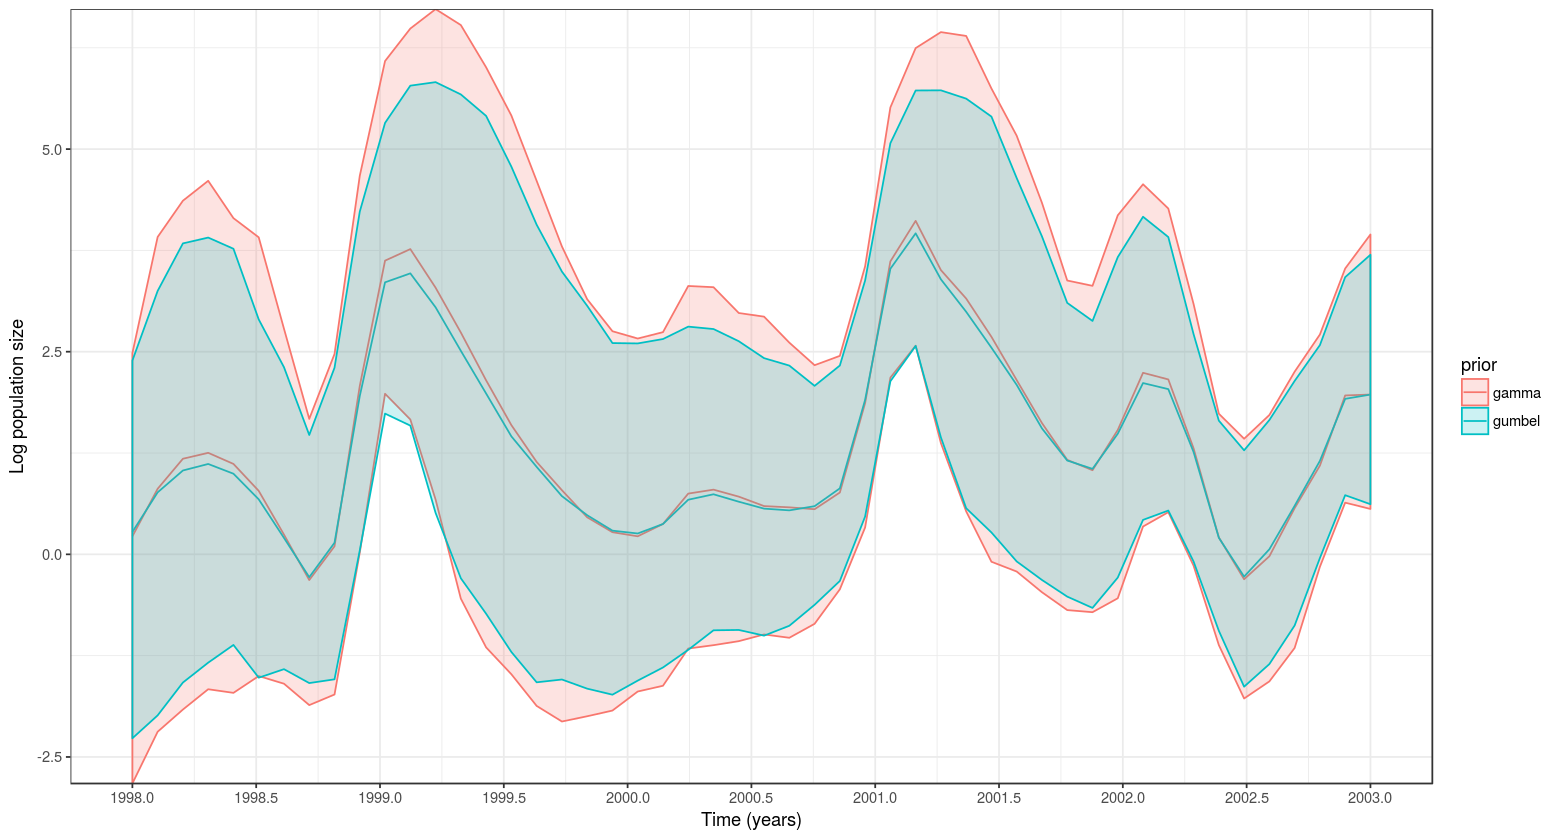

In [31]:
logs_flu_h3n2 <- list(
    gamma = get_skygrid_for_plot(flu_h3n2_gamma),
    gumbel = get_skygrid_for_plot(flu_h3n2_gumbel)
)
options(repr.plot.width = 13, repr.plot.height = 7)
overlay_pop_sizes(logs = logs_flu_h3n2, youngest = 2003, cutOff = 5, group_name = "prior")

For this example, uncertainty is particularly relevant because we are interested in the seasonal peaks. 
So we will plot the posterior distributions for $\tau$ under both models, along with the priors.

In [32]:
forHist <- rbind(
    data.frame(tau = sky_flu_h3n2_gamma$skygrid.precision, prior = "gamma"),
    data.frame(tau = sky_flu_h3n2_gumbel$skygrid.precision, prior = "gumbel")
)

SHA-1 hash of file is 20c0c696c5498d9d14a0748ae7b267e8edee95e9


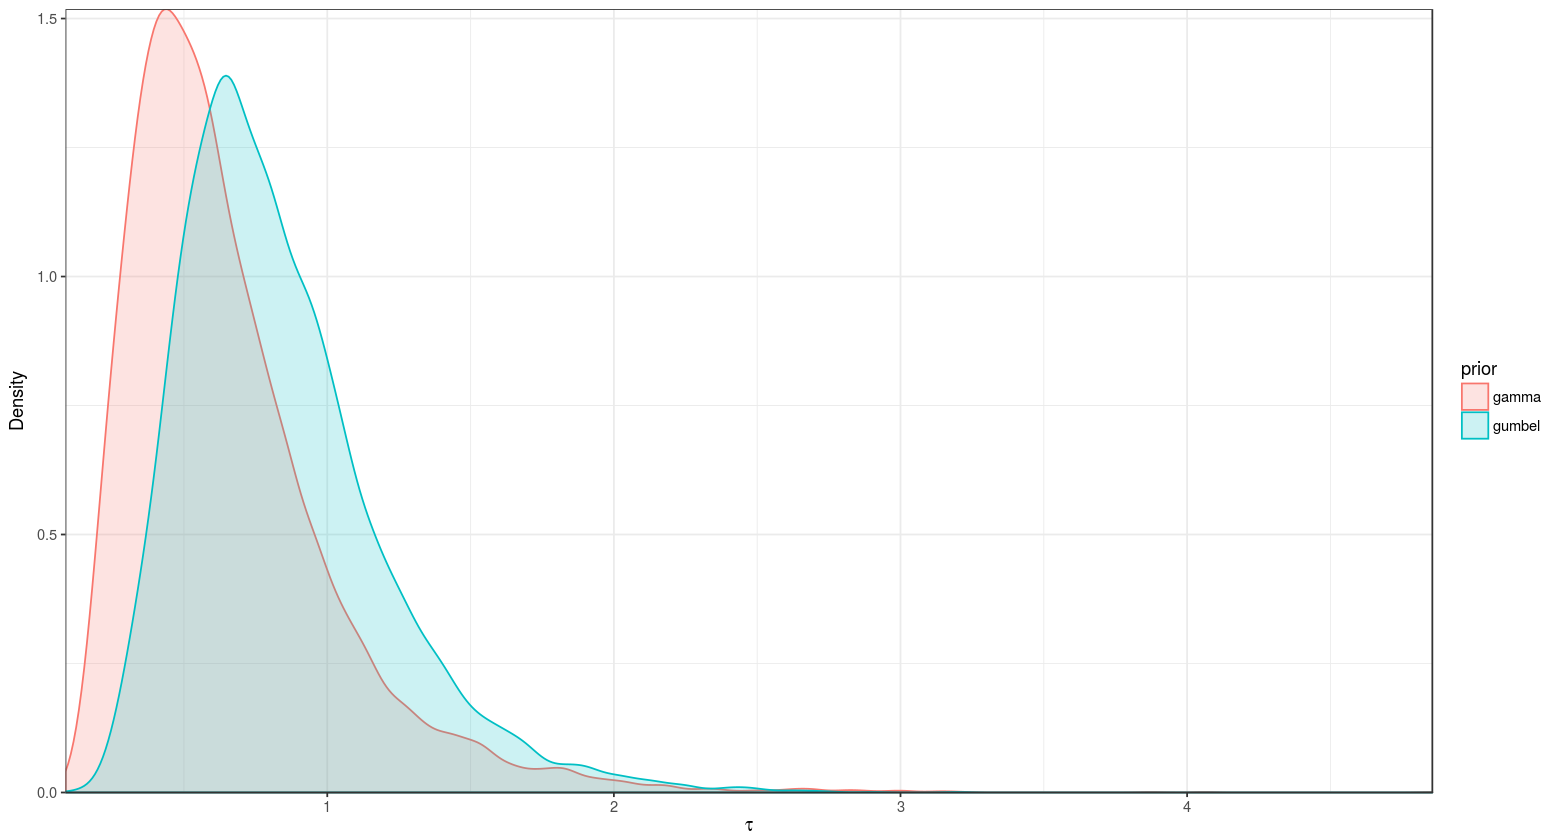

In [33]:
devtools::source_url("https://raw.githubusercontent.com/maxbiostat/CODE/e46bc08f73451c5f6115c8ad93661374484d0eeb/R/DISTRIBUTIONS/Gumbel_type2.r")

gg_color_hue <- function(n) { ## https://stackoverflow.com/questions/8197559/emulate-ggplot2-default-color-palette
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}
ggplot(data = forHist, aes(x = tau, colour = prior, fill = prior)) +
geom_density(alpha = 0.2) +
scale_y_continuous("Density", expand = c(0, 0) ) +
scale_x_continuous(expression(tau), expand = c(0, 0) ) +
theme_bw()

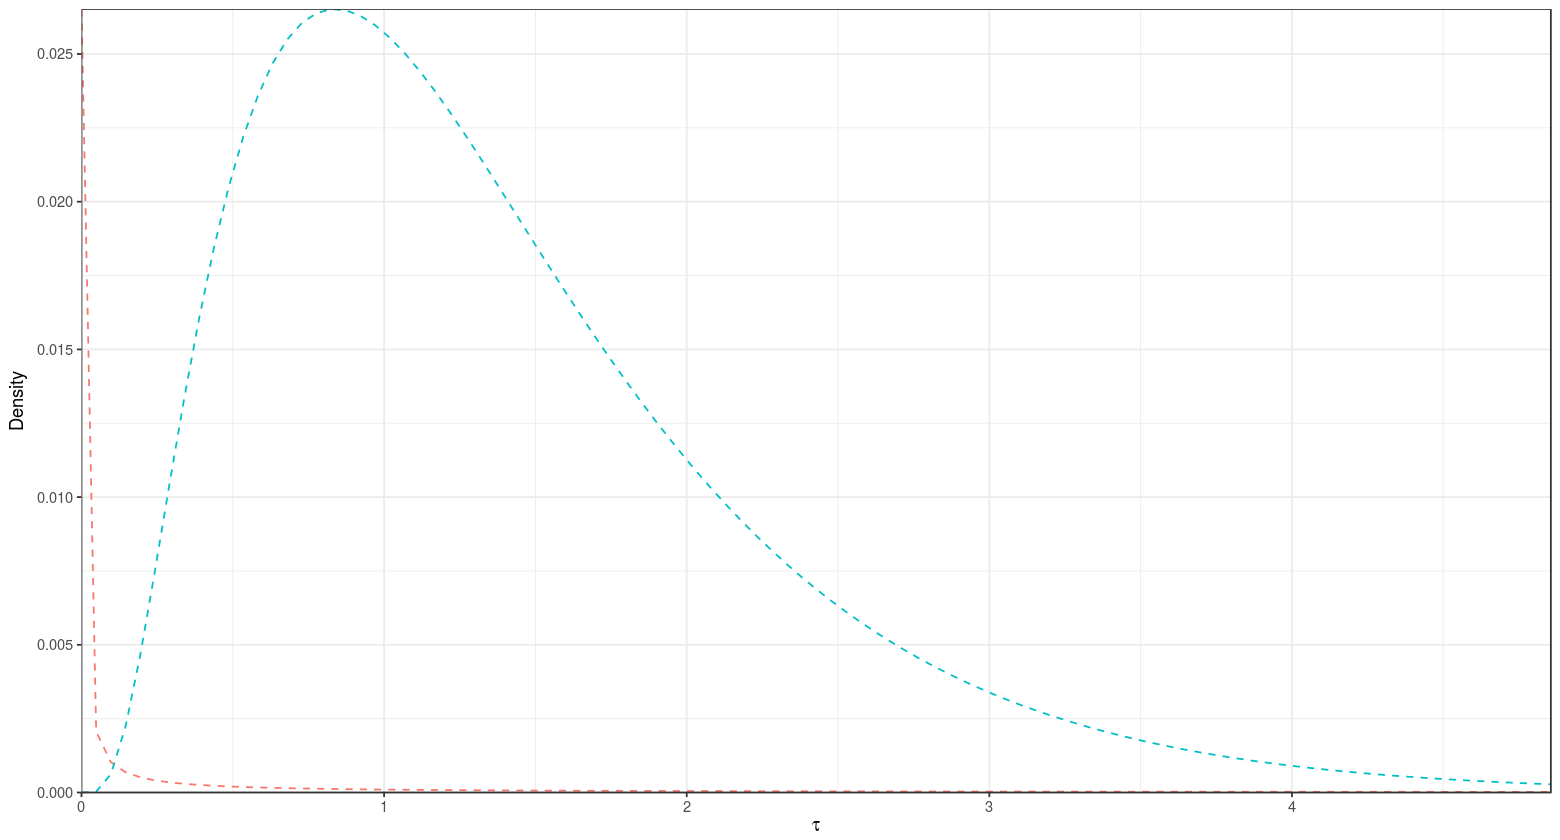

In [34]:
ggplot(data = data.frame(x = c(0, max(forHist$tau))), aes(x = x) )  +
stat_function(fun = function(x) dgamma(x, shape = 0.0001, scale = 1000),
              colour = gg_color_hue(1), linetype = "dashed") +
stat_function(fun = function(x) dgumbel2(x, a = 1/2, b = 2.30), colour = gg_color_hue(2)[-1], linetype = "dashed") +
scale_y_continuous("Density", expand = c(0, 0) ) +
scale_x_continuous(expression(tau), expand = c(0, 0) ) +
theme_bw()

In [35]:
forHist_dts <- rbind(
    data.frame(tau = sky_denv4_gamma$skygrid.precision, prior = "gamma", data_set ="denv4"),
    data.frame(tau = sky_denv4_gumbel$skygrid.precision, prior = "gumbel", data_set ="denv4"),
    data.frame(tau = sky_fmdv_A_gamma$skygrid.precision, prior = "gamma", data_set  = "fmdvA"),
    data.frame(tau = sky_fmdv_A_gumbel$skygrid.precision, prior = "gumbel", data_set = "fmdvA"),
    data.frame(tau = sky_fmdv_O_gamma$skygrid.precision, prior = "gamma", data_set  = "fmdvO"),
    data.frame(tau = sky_fmdv_O_gumbel$skygrid.precision, prior = "gumbel", data_set = "fmdvO"),
    data.frame(tau = sky_flu_h3n2_gamma$skygrid.precision, prior = "gamma", data_set = "fluh3n2"),
    data.frame(tau = sky_flu_h3n2_gumbel$skygrid.precision, prior = "gumbel", data_set = "fluh3n2")
)

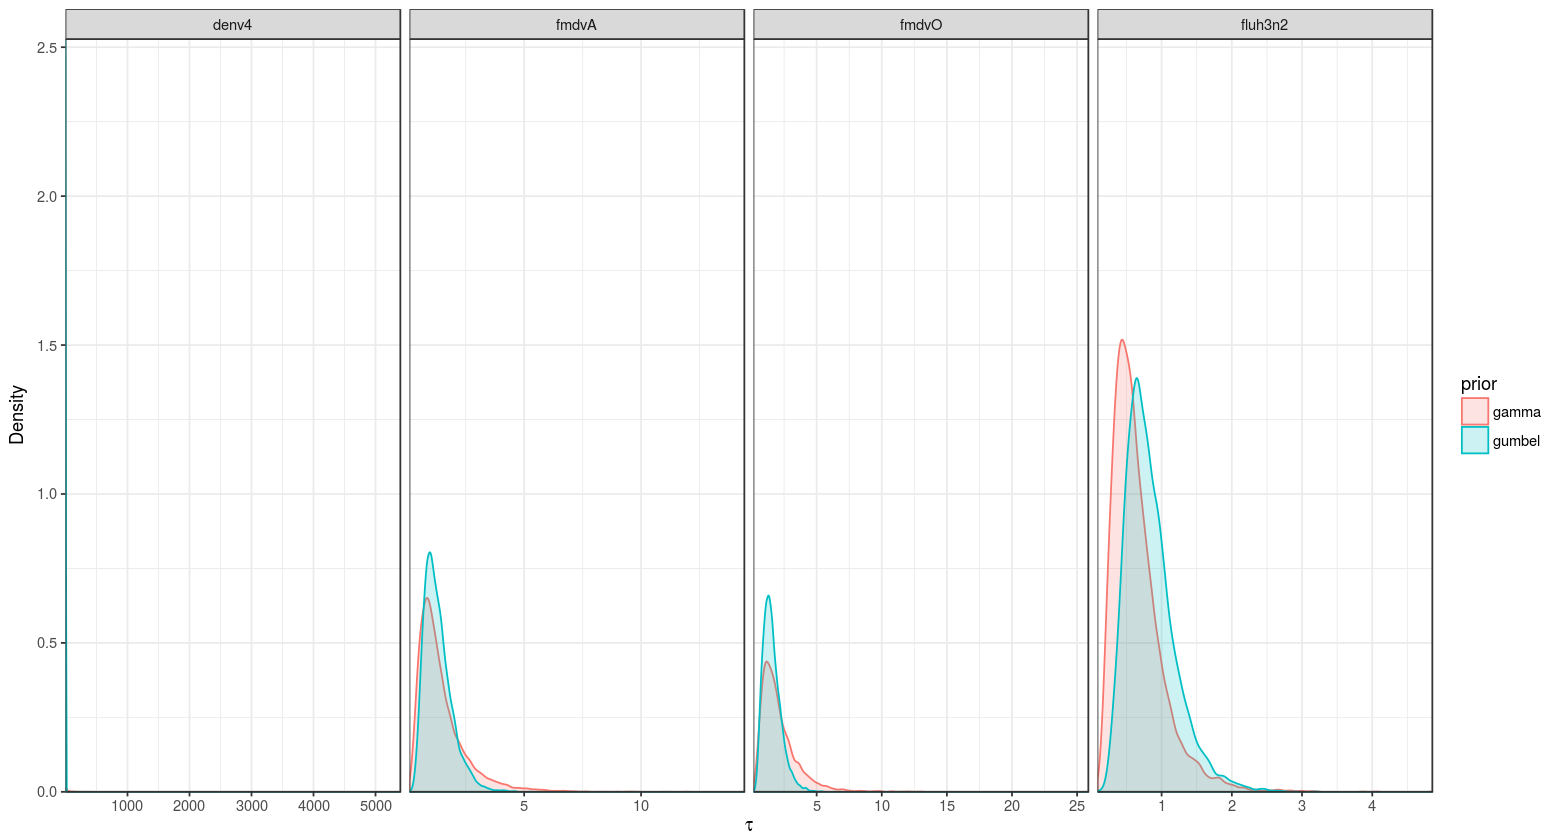

In [36]:
ggplot(data = forHist_dts, aes(x = tau, colour = prior, fill = prior)) +
geom_density(alpha = 0.2) +
scale_y_continuous("Density", expand = c(0, 0) ) +
scale_x_continuous(expression(tau), expand = c(0, 0) ) +
facet_grid(.~data_set, scales = "free") +
theme_bw()

Now it is time to look into YFV

In [56]:
YFV_gamma <- read.table("YFV/YFV_gamma.log", header = TRUE)
YFV_gamma <- remove_warmup(YFV_gamma, burnin = .35)
sky_YFV_gamma <- get_skygrid_pars(YFV_gamma)
ESSs_gamma <- apply(sky_YFV_gamma, 2, coda::effectiveSize)
ESSs_gamma[1]
mean(ESSs_gamma[-1])

skygrid.precision 
         1358.415

[1] 284.264

In [57]:
YFV_gumbel <- read.table("YFV/YFV_gumbel.log", header = TRUE)
YFV_gumbel <- remove_warmup(YFV_gumbel, burnin = .35)
sky_YFV_gumbel <- get_skygrid_pars(YFV_gumbel)
ESSs_gumbel <- apply(sky_YFV_gumbel, 2, coda::effectiveSize)
ESSs_gumbel[1]
mean(ESSs_gumbel[-1])

skygrid.precision 
         2865.971

[1] 256.0892

In [58]:
head(cbind( colMeans(sky_YFV_gamma), coda::HPDinterval(coda::as.mcmc(sky_YFV_gamma)) ))

,,lower,upper
skygrid.precision,130.723139,0.002862747,697.54465
skygrid.logPopSize1,7.257970,5.855404769,12.23528
skygrid.logPopSize2,7.083742,5.143509750,12.22258
skygrid.logPopSize3,7.085386,4.970464755,12.31147
skygrid.logPopSize4,6.945055,4.493272869,12.26851
skygrid.logPopSize5,6.837563,3.968578717,12.37981


In [67]:
head( cbind( colMeans(sky_YFV_gumbel), coda::HPDinterval(coda::as.mcmc(sky_YFV_gumbel))  ) )

,,lower,upper
skygrid.precision,1.573241,0.2509463,3.369787
skygrid.logPopSize1,7.504272,5.9161324,10.701015
skygrid.logPopSize2,6.855980,4.8777286,9.788260
skygrid.logPopSize3,6.854489,4.1205110,9.412131
skygrid.logPopSize4,6.774132,3.6404804,9.521502
skygrid.logPopSize5,6.664994,3.1954544,9.791346


Warning message in overlay_pop_sizes(logs = logs_YFV, youngest = 2009, cutOff = 3000, :
“supplied youngest not of right dimension, replicating 
”Warning message in overlay_pop_sizes(logs = logs_YFV, youngest = 2009, cutOff = 3000, :
“supplied cutOff not of right dimension, replicating 
”

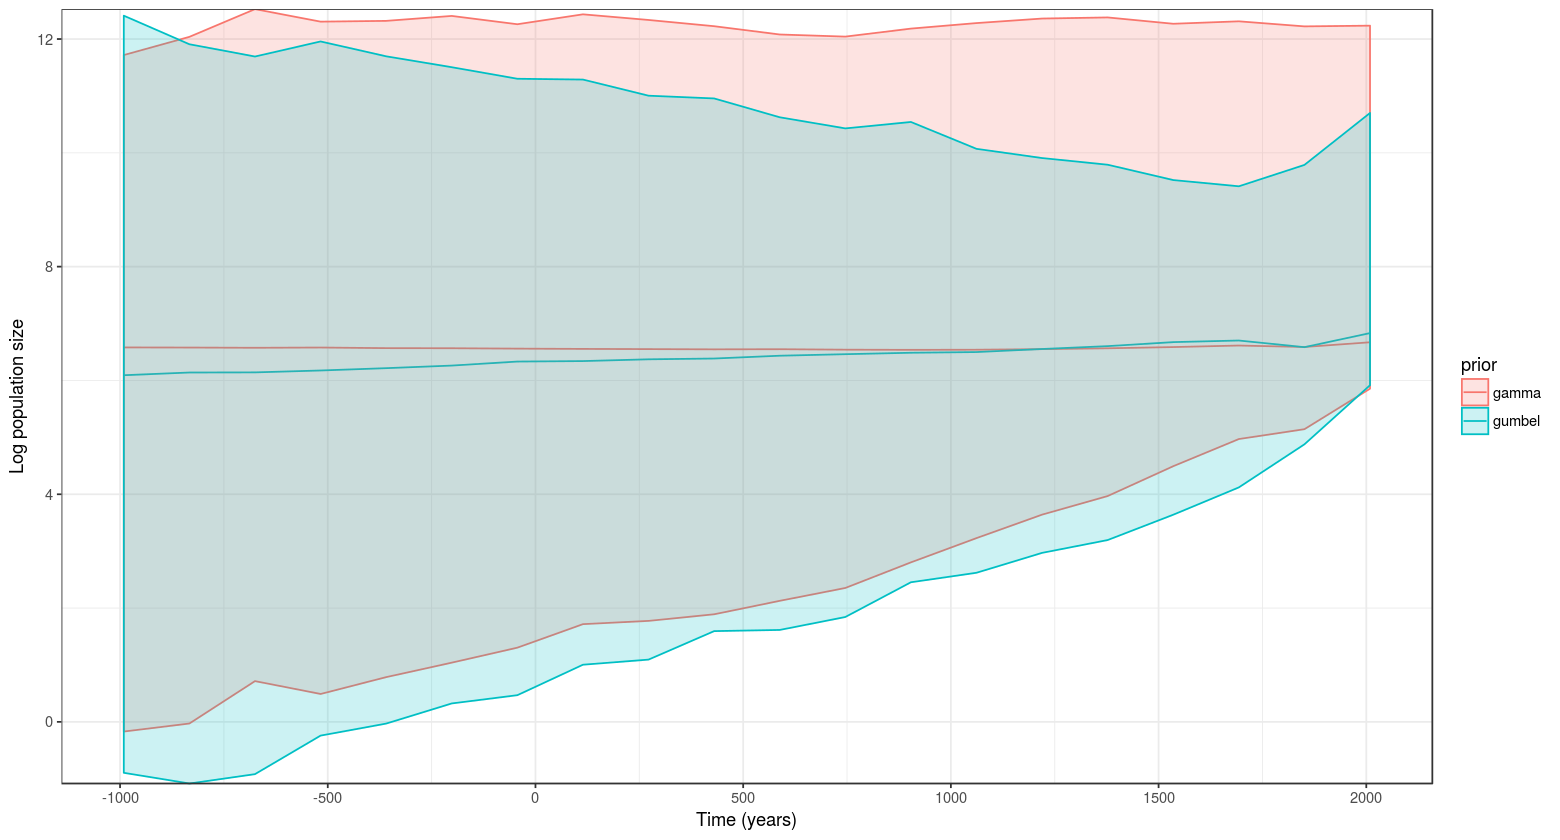

In [62]:
logs_YFV <- list(
    gamma = get_skygrid_for_plot(YFV_gamma),
    gumbel = get_skygrid_for_plot(YFV_gumbel)
)
options(repr.plot.width = 13, repr.plot.height = 7)
overlay_pop_sizes(logs = logs_YFV, youngest = 2009, cutOff = 3000, group_name = "prior")

Now we will look into a prior sensitivity analysis (PSA) for both the Gamma and Gumbel families

In [37]:
denv4_gammas_logs <- list(
 "0.001" = remove_warmup(read.table(file = "dengue4/replicate_paper/Dengue4_mean1.log", header = TRUE)),
 "0.002"= remove_warmup(read.table(file = "dengue4/replicate_paper/Dengue4_mean2.log", header = TRUE)),
 "0.005" = remove_warmup(read.table(file = "dengue4/replicate_paper/Dengue4_mean5.log", header = TRUE)),   
 "0.01" = remove_warmup(read.table(file = "dengue4/replicate_paper/Dengue4_mean10.log", header = TRUE)),
 "0.1" = remove_warmup(read.table(file = "dengue4/replicate_paper/Dengue4_mean100.log", header = TRUE))
)

In [38]:
skys_denv4_gamma_psa <- lapply(denv4_gammas_logs, get_skygrid_for_plot)

Warning message in overlay_pop_sizes(logs = skys_denv4_gamma_psa, youngest = 1994, :
“supplied youngest not of right dimension, replicating 
”Warning message in overlay_pop_sizes(logs = skys_denv4_gamma_psa, youngest = 1994, :
“supplied cutOff not of right dimension, replicating 
”

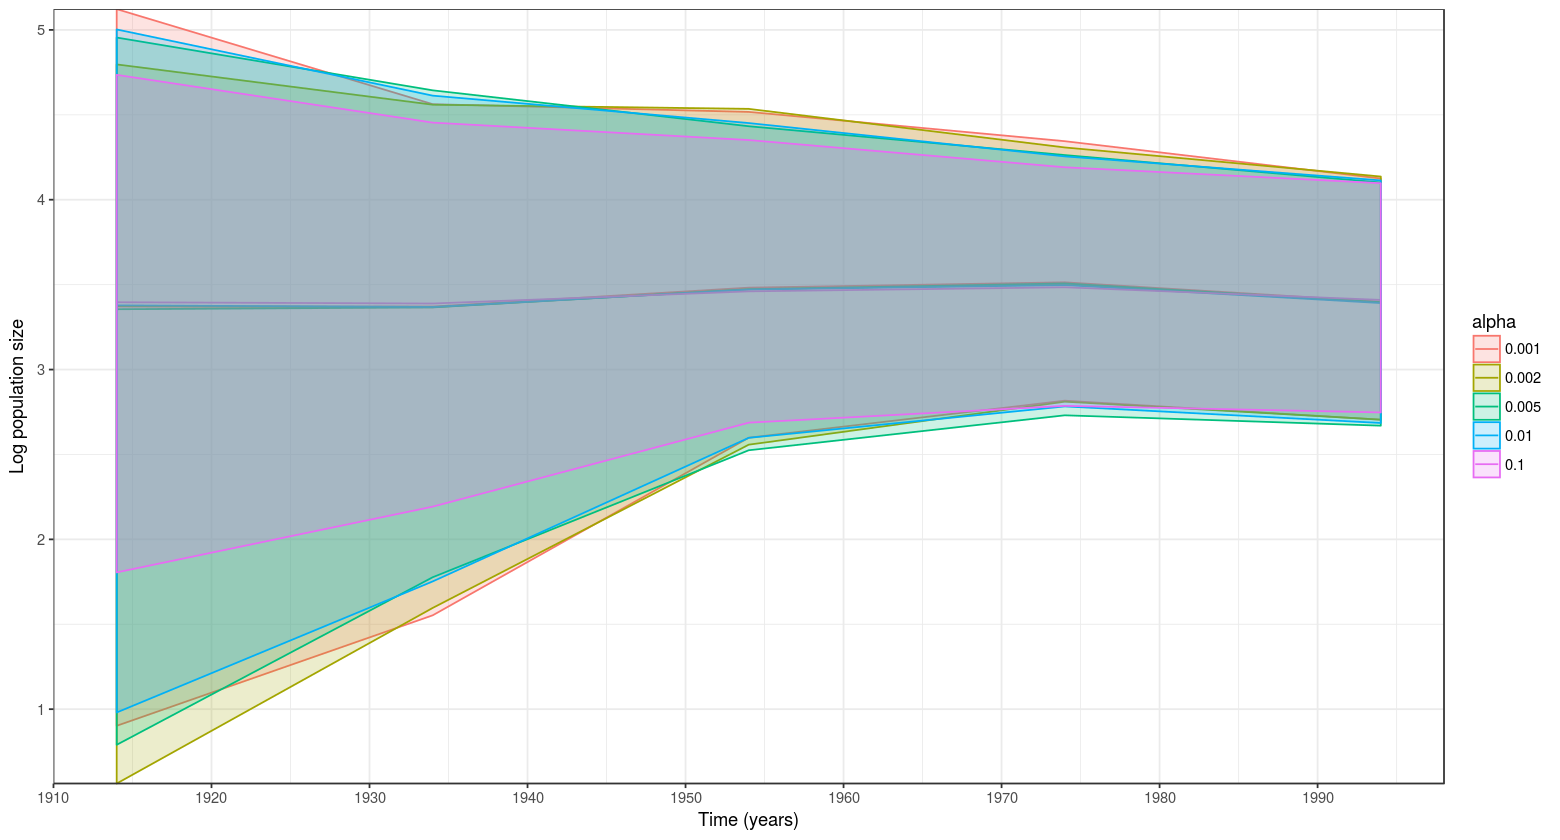

In [39]:
overlay_pop_sizes(logs = skys_denv4_gamma_psa, youngest = 1994, cutOff = 80, group_name = "alpha")

In [50]:
denv4_gumbels_logs <- list(
 "1" = remove_warmup(read.table(file = "dengue4/replicate_paper/Dengue4_S1.log", header = TRUE)),
 "2" = remove_warmup(read.table(file = "dengue4/replicate_paper/Dengue4_S2.log", header = TRUE)),
 "5" = remove_warmup(read.table(file = "dengue4/replicate_paper/Dengue4_S5.log", header = TRUE)),   
 "50" = remove_warmup(read.table(file = "dengue4/replicate_paper/Dengue4_S50.log", header = TRUE)),
 "100" = remove_warmup(read.table(file = "dengue4/replicate_paper/Dengue4_S100.log", header = TRUE))
)

In [51]:
skys_denv4_gumbel_psa <- lapply(denv4_gumbels_logs, get_skygrid_for_plot)

Warning message in overlay_pop_sizes(logs = skys_denv4_gumbel_psa, youngest = 1994, :
“supplied youngest not of right dimension, replicating 
”Warning message in overlay_pop_sizes(logs = skys_denv4_gumbel_psa, youngest = 1994, :
“supplied cutOff not of right dimension, replicating 
”

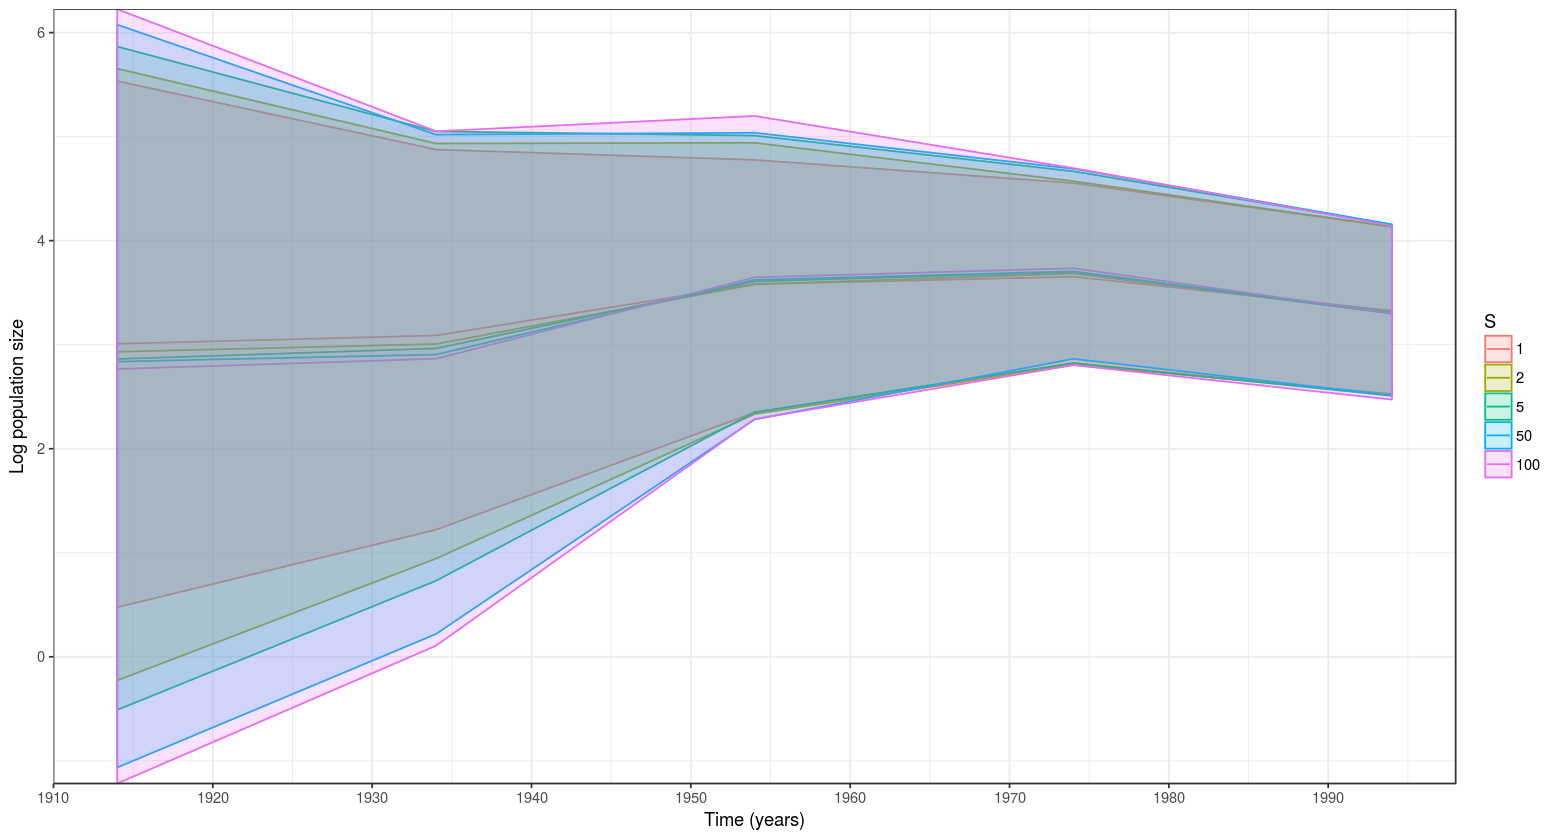

In [52]:
overlay_pop_sizes(logs = skys_denv4_gumbel_psa, youngest = 1994, cutOff = 80, group_name = "S")

In [53]:
lapply(denv4_gammas_logs, function(dt) {
    x <- dt$skygrid.precision
    return(
        data.frame(mean = mean(x), median = median(x),
                   coda::HPDinterval(as.mcmc(x)), se = mcmcse::mcse(x)[2],  ESS = coda::effectiveSize(x))
    )
}  )

,mean,median,lower,upper,se,ESS
var1,138.4339,20.62495,0.002325134,716.4348,11.15492,844.1579
,mean,median,lower,upper,se,ESS
var1,157.0189,22.91424,0.001190586,806.4736,13.22161,782.7117
,mean,median,lower,upper,se,ESS
var1,154.4248,24.75165,0.00207788,792.1612,10.53283,935.8545
,mean,median,lower,upper,se,ESS
var1,173.6317,29.54665,0.003411848,902.2128,13.74983,757.7978
,mean,median,lower,upper,se,ESS
var1,232.3614,53.06187,0.003299989,1088.691,15.52316,781.1609


In [54]:
lapply(denv4_gumbels_logs, function(dt) {
    x <- dt$skygrid.precision
    return(
        data.frame(mean = mean(x), median = median(x),
                   coda::HPDinterval(as.mcmc(x)), se = mcmcse::mcse(x)[2],  ESS = coda::effectiveSize(x))
    )
}  )

,mean,median,lower,upper,se,ESS
var1,1.585494,1.404256,0.2449792,3.349995,0.01511294,3525.937
,mean,median,lower,upper,se,ESS
var1,1.300202,1.121686,0.1486228,2.929067,0.01460763,3255.83
,mean,median,lower,upper,se,ESS
var1,1.116831,0.9266918,0.04681425,2.642931,0.01506202,2677.112
,mean,median,lower,upper,se,ESS
var1,1.012442,0.8169016,0.01498744,2.583658,0.01593421,2617.583
,mean,median,lower,upper,se,ESS
var1,0.9716408,0.7863295,0.0165829,2.441084,0.01609058,2123.822


In [76]:
overlay_pop_sizes <- function(logs, youngest, cutOff, group_name = NULL){
  require(ggplot2)
  number_ticks <- function(n) {function(limits) pretty(limits, n)}
  ## 'logs' is a  **named** list of subsetted log files with the parameters of interest (popSizes)
  L <- length(logs)
  if(length(youngest) < L){
      warning("supplied youngest not of right dimension, replicating \n")
      youngest <- rep(youngest, L)
  }
  if(length(cutOff) < L){
      warning("supplied cutOff not of right dimension, replicating \n")
      cutOff <- rep(cutOff, L)
  } 
  M <- unlist(lapply(logs, ncol))
  ## Compute median and HPDs
  summaries <- lapply(logs, function(ll) {
    res <- cbind( apply(ll, 2, median), coda::HPDinterval(coda::as.mcmc(ll)))
    colnames(res) <- c("median", "lower", "upper")
    return(res)
  } )
  ## create ages and groups
  for(i in 1:L){
    summaries[[i]] <- data.frame(summaries[[i]], group = names(logs)[i],
                                 time = seq(youngest[i], youngest[i]-cutOff[i], length.out = M[i]) ) 
  } 
  forPlot <- do.call(rbind, summaries)
  if(is.null(group_name)) group_name <- "group"
  p <- ggplot(forPlot, aes( x = time, y = median, colour = group, fill = group)) + 
    geom_line() +
    geom_ribbon(aes(ymin = lower, ymax = upper), alpha = .2)+ 
    labs(fill = group_name, color = group_name) +
    scale_x_continuous("Time (years)", breaks = number_ticks(10)) + 
    scale_y_continuous("Log population size", expand = c(0, 0)) + 
    theme_bw()
  return(p)    
}

In [88]:
library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)
p0 <- overlay_pop_sizes(logs = logs_denv4, youngest = c(1994, 1994), cutOff = c(80, 80), group_name = "prior")
p0 <- p0 +  theme(legend.position = "none")
p1 <- overlay_pop_sizes(logs = logs_flu_h3n2, youngest = 2003, cutOff = 5, group_name = "prior")  
pdf("skygrids_denv4_flu.pdf", width = 20, height = 10)
options(repr.plot.width = 13, repr.plot.height = 7)
cowplot::plot_grid(p0, p1,
                   align = 'h', nrow = 1, ncol = 2, labels = LETTERS[1:2])
dev.off()

Warning message in overlay_pop_sizes(logs = logs_flu_h3n2, youngest = 2003, cutOff = 5, :
“supplied youngest not of right dimension, replicating 
”Warning message in overlay_pop_sizes(logs = logs_flu_h3n2, youngest = 2003, cutOff = 5, :
“supplied cutOff not of right dimension, replicating 
”

png 
  2